In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics
from pylab import rcParams

In [ ]:
#DICE = [1,2,3,4,5,6]
#PROB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
#pop_mean = sum(DICE) / len(DICE)
#print(pop_mean)
#x=np.random.choice(a=DICE, p=PROB, size=1_000_000).mean()
#print(x)

In [76]:
DICE = [1,2,3,4,5,6]
PROB = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

sample_means = []
sample_sizes = range(5,100,10)

#for size in sample_sizes:
#    sample = np.random.choice(a=DICE,  p=PROB, size=size)
#    sample_means.append(sample.mean())# append the sameple mean to the list

# Instead of using for loop, we use the parsimonious list comprehension 
sample_means = [np.random.choice(a=DICE, p=PROB, size=s).mean() for s in sample_sizes] 


sample_means[:10]
sample_sizes[-1]

995

Text(0.5, 0, 'Sample Size')

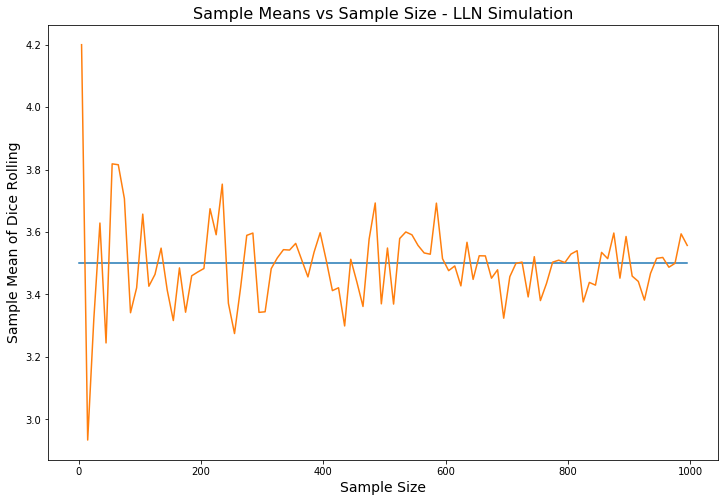

In [77]:
# Next, we make a line plot to show the relationship between sample mean and sample size

pop_mean = np.mean(DICE)  

fig, ax = plt.subplots(figsize=(12,8))

# draw a horizontal line of the population mean                                             
ax.plot((0,sample_sizes[-1]),(pop_mean, pop_mean)) 

# make a line plot of sample means (y-axis) along sample sizes (x-axis)
ax.plot(sample_sizes, sample_means) 
                   
ax.set_title("Sample Means vs Sample Size - LLN Simulation", size=16)
ax.set_ylabel("Sample Mean of Dice Rolling", size=14)
ax.set_xlabel("Sample Size", size=14)

Text(0, 0.5, 'Density')

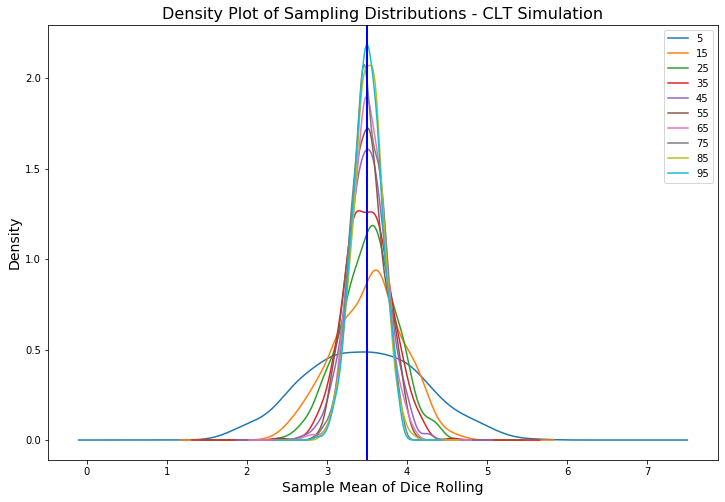

In [85]:
fig, ax = plt.subplots(figsize=(12,8))

for s in range(5,100,10):     #sample sizes
    sample_means = []
    for i in range(500):        #repeat the experiment enough times to get a distribution
        sample = np.random.choice(a=DICE,  p=PROB, size=s)
        sample_means.append(sample.mean())              #append the sameple mean to the list

# The matplotlib histrogram does not look good. Use Pandas density plot instead.
#   ax.hist(sample_means, density=True, legend=True) 
    pd.DataFrame(sample_means).plot.density(ax=ax)

ax.legend(sample_sizes) 

# draw a vertical line of the population mean 
ax.axvline(x=pop_mean, linewidth=2, color="b")  

ax.set_title("Density Plot of Sampling Distributions - CLT Simulation", size=16)
ax.set_xlabel("Sample Mean of Dice Rolling",size=14)
ax.set_ylabel("Density",size=14)

In [82]:
sample_means = []
for i in range(500):        # repeat the experiment enough times to get a distribution
      sample = np.random.choice(a=DICE,  p=PROB, size=5)
      sample_means.append(sample.mean())
sample_means[:5]

[2.2, 3.2, 2.8, 3.2, 3.4]

(array([ 6., 13., 37., 51., 87., 89., 96., 72., 29., 20.]),
 array([1.2 , 1.62, 2.04, 2.46, 2.88, 3.3 , 3.72, 4.14, 4.56, 4.98, 5.4 ]),
 <a list of 10 Patch objects>)

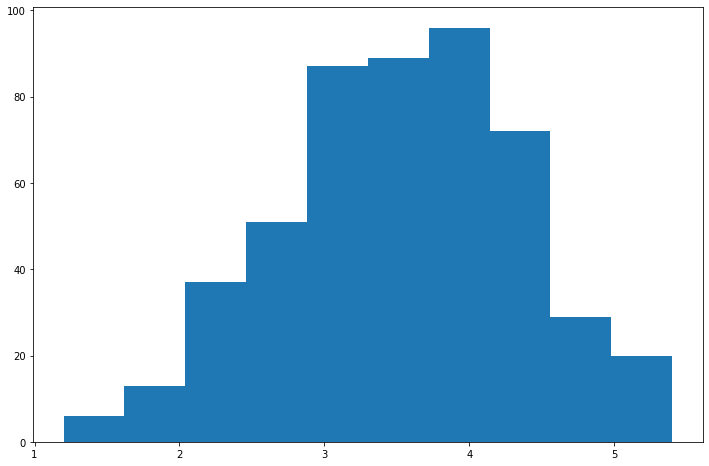

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(sample_means)

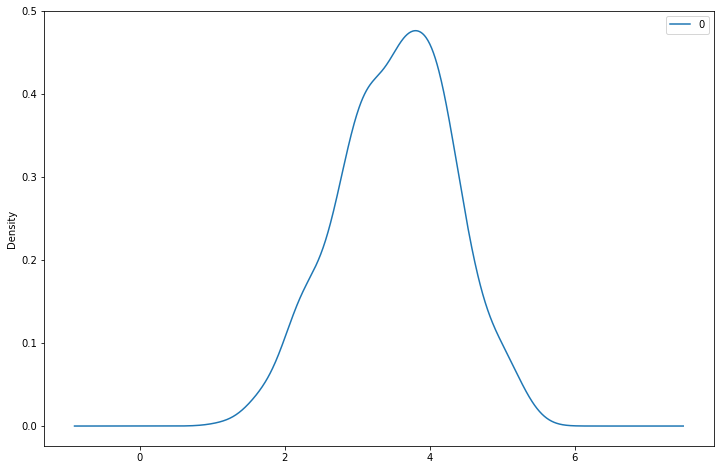

In [68]:
fig, ax = plt.subplots(figsize=(12,8))
df=pd.DataFrame(sample_means)
df.plot.density(ax=ax)